In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from pickle import dump

In [3]:
df= pd.read_csv('../data/processed/merged_dataset_pivoted.csv')
df.head()

,time,host,total_events,is_malicious,event_1,event_3,event_8,event_10,event_11,event_12,...,event_4658,event_4661,event_4663,event_4672,event_4698,event_4768,event_5140,event_5145,event_5156,event_5158
0,3,Comp581624,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,Comp581624,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,Comp581624,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,Comp581624,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,Comp581624,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
columns = list(df.columns)
features = columns[4:]
df[features] = df[features].div(df.total_events, axis = 0)
# Separating out the features
X = df.loc[:, features].values
y = df.loc[:, ['is_malicious']].values
print(X)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)
pca_df = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])

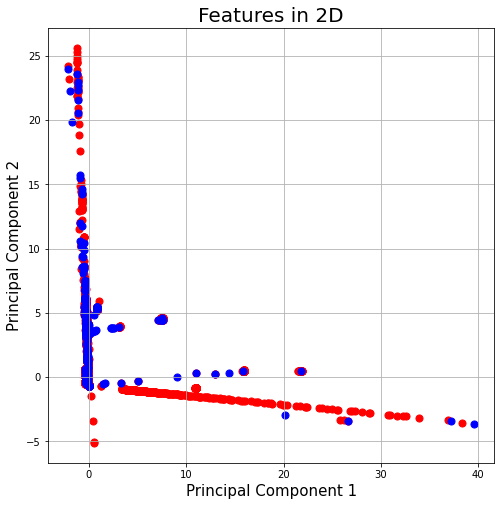

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Features in 2D', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['is_malicious'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'pc1']
               , pca_df.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
    
# ax.legend(targets)
# ax.scatter(pca_df['pc1']
#                , pca_df['pc2']
#                , s = 50)
ax.grid()

In [8]:
smote = SMOTE(random_state=0, sampling_strategy="minority")
X_os, y_os = smote.fit_resample(X, y)
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size = 0.2, random_state=2)

In [9]:
# Decision Tree Classifier

# Create Decision Tree classifer object
clf_os = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_os.fit(X_train_os, y_train_os)

# Predict the response for the test dataset
y_pred_os = clf_os.predict(X_test_os)

# Check Prediction
print(classification_report(y_test_os, y_pred_os))
# print(confusion_matrix(y_test_os, y_pred_os))
print("Accuracy:", accuracy_score(y_test_os, y_pred_os))
print("Label 0:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 0))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 0))
print("Label 1:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 1))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12930
           1       0.99      0.99      0.99     12767

    accuracy                           0.99     25697
   macro avg       0.99      0.99      0.99     25697
weighted avg       0.99      0.99      0.99     25697

Accuracy: 0.9879363349807371
Label 0:
Precision: 0.9854593014309894
Recall: 0.9906419180201083
Label 1:
Precision: 0.9904716906843058
Recall: 0.9851962089762669


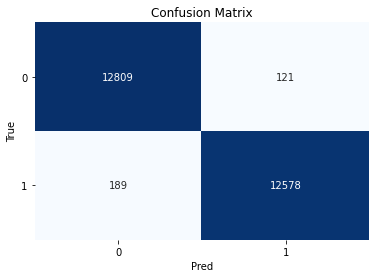

In [10]:
classes = np.unique(y_pred_os)
fig,ax = plt.subplots()
cm = metrics.confusion_matrix(y_test_os,y_pred_os,labels=classes)
sns.heatmap(cm, annot=True,fmt='d',cmap=plt.cm.Blues,cbar=False)
ax.set(xlabel="Pred",ylabel="True",title="Confusion Matrix")
ax.set_yticklabels(labels=classes,rotation=0)
plt.show()

In [11]:
# K Neighbors Classifier

# Create K Neighbors Classifier Object
neigh = KNeighborsClassifier(n_neighbors=3)

# Train K Neighbors Classifier Object
neigh.fit(X_train_os,y_train_os.ravel())

# Predict the response for test dataset
y_pred_os = neigh.predict(X_test_os)

# Check Prediction
print(classification_report(y_test_os, y_pred_os))
# print(confusion_matrix(y_test_os, y_pred_os))
print("Accuracy:", accuracy_score(y_test_os, y_pred_os))
print("Label 0:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 0))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 0))
print("Label 1:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 1))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12930
           1       0.99      0.98      0.99     12767

    accuracy                           0.99     25697
   macro avg       0.99      0.99      0.99     25697
weighted avg       0.99      0.99      0.99     25697

Accuracy: 0.9863408179943184
Label 0:
Precision: 0.9836960701376606
Recall: 0.9892498066511988
Label 1:
Precision: 0.9890499448558374
Recall: 0.9833946894336962


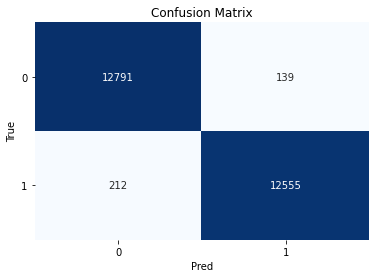

In [12]:
classes = np.unique(y_pred_os)
fig,ax = plt.subplots()
cm = metrics.confusion_matrix(y_test_os,y_pred_os,labels=classes)
sns.heatmap(cm, annot=True,fmt='d',cmap=plt.cm.Blues,cbar=False)
ax.set(xlabel="Pred",ylabel="True",title="Confusion Matrix")
ax.set_yticklabels(labels=classes,rotation=0)
plt.show()

In [13]:
# Logistic Regression

# Instantiate Model
model = LogisticRegression()

# Fit 
model.fit(X_train_os,y_train_os)

# Predict
y_pred_os = model.predict(X_test_os)

# Check Prediction
print(classification_report(y_test_os, y_pred_os))
# print(confusion_matrix(y_test_os, y_pred_os))
print("Accuracy:", accuracy_score(y_test_os, y_pred_os))
print("Label 0:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 0))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 0))
print("Label 1:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 1))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 1))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     12930
           1       0.90      0.90      0.90     12767

    accuracy                           0.90     25697
   macro avg       0.90      0.90      0.90     25697
weighted avg       0.90      0.90      0.90     25697

Accuracy: 0.9002996458730591
Label 0:
Precision: 0.9038641321283889
Recall: 0.897293116782676
Label 1:
Precision: 0.8967420884845657
Recall: 0.9033445601942508


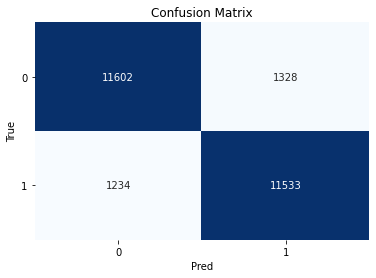

In [14]:
classes = np.unique(y_pred_os)
fig,ax = plt.subplots()
cm = metrics.confusion_matrix(y_test_os,y_pred_os,labels=classes)
sns.heatmap(cm, annot=True,fmt='d',cmap=plt.cm.Blues,cbar=False)
ax.set(xlabel="Pred",ylabel="True",title="Confusion Matrix")
ax.set_yticklabels(labels=classes,rotation=0)
plt.show()

In [15]:
print(classes)

[0 1]


In [16]:
# Random Forest:

# Instantiate Model
random_model = RandomForestClassifier()

# Fit
random_model.fit(X_train_os, y_train_os)

# Predict
y_pred_os = random_model.predict(X_test_os)

# Check Prediction
print(classification_report(y_test_os, y_pred_os))
# print(confusion_matrix(y_test_os, y_pred_os))
print("Accuracy:", accuracy_score(y_test_os, y_pred_os))
print("Label 0:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 0))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 0))
print("Label 1:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 1))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12930
           1       0.99      0.99      0.99     12767

    accuracy                           0.99     25697
   macro avg       0.99      0.99      0.99     25697
weighted avg       0.99      0.99      0.99     25697

Accuracy: 0.9894929369187064
Label 0:
Precision: 0.9892564538568558
Recall: 0.9898685228151586
Label 1:
Precision: 0.9897327376753664
Recall: 0.9891125558079423


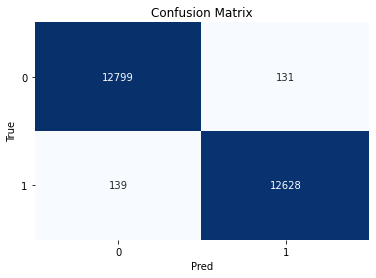

In [17]:
classes = np.unique(y_pred_os)
fig,ax = plt.subplots()
cm = metrics.confusion_matrix(y_test_os,y_pred_os,labels=classes)
sns.heatmap(cm, annot=True,fmt='d',cmap=plt.cm.Blues,cbar=False)
ax.set(xlabel="Pred",ylabel="True",title="Confusion Matrix")
ax.set_yticklabels(labels=classes,rotation=0)
plt.show()

In [18]:
# Gradient Boosting Classifier

# Instantiate Model
gb = GradientBoostingClassifier()

# Fit
gb.fit(X_train_os, y_train_os)

# Predict
y_pred_os = gb.predict(X_test_os)

# Check Prediction
print(classification_report(y_test_os, y_pred_os))
# print(confusion_matrix(y_test_os, y_pred_os))
print("Accuracy:", accuracy_score(y_test_os, y_pred_os))
print("Label 0:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 0))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 0))
print("Label 1:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 1))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     12930
           1       0.92      0.96      0.94     12767

    accuracy                           0.94     25697
   macro avg       0.94      0.94      0.94     25697
weighted avg       0.94      0.94      0.94     25697

Accuracy: 0.9386698836440052
Label 0:
Precision: 0.9556911221704929
Recall: 0.9208043310131477
Label 1:
Precision: 0.9226527683359771
Recall: 0.9567635309783035


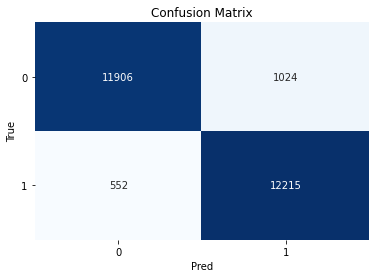

In [19]:
classes = np.unique(y_pred_os)
fig,ax = plt.subplots()
cm = metrics.confusion_matrix(y_test_os,y_pred_os,labels=classes)
sns.heatmap(cm, annot=True,fmt='d',cmap=plt.cm.Blues,cbar=False)
ax.set(xlabel="Pred",ylabel="True",title="Confusion Matrix")
ax.set_yticklabels(labels=classes,rotation=0)
plt.show()

In [20]:
# # sklearn.svm.SVC (Support Vector Classification)

# svc = SVC(gamma="auto")

# svc.fit(X_train_os, y_train_os)

# # Predict
# y_pred_os = svc.predict(X_test_os)

# # Check Prediction
# print(classification_report(y_test_os, y_pred_os))
# # print(confusion_matrix(y_test_os, y_pred_os))
# print("Accuracy:", accuracy_score(y_test_os, y_pred_os))
# print("Label 0:")
# print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 0))
# print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 0))
# print("Label 1:")
# print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 1))
# print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 1))

In [21]:
# classes = np.unique(y_pred_os)
# fig,ax = plt.subplots()
# cm = metrics.confusion_matrix(y_test_os,y_pred_os,labels=classes)
# sns.heatmap(cm, annot=True,fmt='d',cmap=plt.cm.Blues,cbar=False)
# ax.set(xlabel="Pred",ylabel="True",title="Confusion Matrix")
# ax.set_yticklabels(labels=classes,rotation=0)
# plt.show()

### Creation of features for chain of events for attacks

In [22]:
df = pd.read_csv('../data/processed/merged_dataset_pivoted.csv')
df.head()

,time,host,total_events,is_malicious,event_1,event_3,event_8,event_10,event_11,event_12,...,event_4658,event_4661,event_4663,event_4672,event_4698,event_4768,event_5140,event_5145,event_5156,event_5158
0,3,Comp581624,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,Comp581624,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,Comp581624,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,Comp581624,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,Comp581624,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Lateral Movement (Link: https://www.rapid7.com/resources/using-windows-event-logs-to-detect-lateral-movement/):
Using window event logs to detect lateral movement:

Authentication Events (all):
1. Event_528 <-- Successful Login
2. Event_529 <-- Unsucessful Login
3. Event_4624 and Event_4625 <-- Two methods of Lateral Movement (Windows NT5 and Nt6 Operating Systems)

- SMB: 552, 4648
- Scheduled Tasks: 602, 4698
- PS Exec: 601, 4697 <-- System Admin Tool to execute code remote
- SSH: app logs <-- Less common in windows environment

In [23]:
df[["event_4624", "event_4625", "event_4648", "event_4698"]].head()

,event_4624,event_4625,event_4648,event_4698
0,1,0,0,0
1,6,0,0,0
2,6,0,2,0
3,8,0,2,0
4,11,0,2,0


In [24]:
df["total_authN_events"] = df["event_4624"] + df["event_4625"] # ".Logon Type:[\W](3|10).*"
df.head()

,time,host,total_events,is_malicious,event_1,event_3,event_8,event_10,event_11,event_12,...,event_4661,event_4663,event_4672,event_4698,event_4768,event_5140,event_5145,event_5156,event_5158,total_authN_events
0,3,Comp581624,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5,Comp581624,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,6,Comp581624,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,11,Comp581624,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,13,Comp581624,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11


- PS Exec not there
- No columns for "event_552", "event_528", "event_529", "event_601", "event_602", and "event_4697"
- Have some of the cases for SMB, Scheduled Tasks <-- Look into regenerating dataset to get features
- Have some of the cases for authentication events <-- Same as above

#### Ransomware, malware and cobalt strike (Link: https://www.beyondtrust.com/blog/entry/windows-server-events-monitor):

Ransomware:
- event_8
or
- event_22 <-- Not Contained in the dataframe

Hacker Presence:

- event_104 <-- Event Log was Cleared
- event_1102 <-- Audit Log was Cleared
- event_4719 <-- System Audit Policy Changed

In [25]:
columns = list(df.columns)
features = columns[4:]
print(features)

['event_1', 'event_3', 'event_8', 'event_10', 'event_11', 'event_12', 'event_4624', 'event_4625', 'event_4648', 'event_4658', 'event_4661', 'event_4663', 'event_4672', 'event_4698', 'event_4768', 'event_5140', 'event_5145', 'event_5156', 'event_5158', 'total_authN_events']


#### APT

- event_4674 <-- Account Name, Service, Process, Object
- event_4688 <-- Account Name, Process

Type Ratio:
- event_4624 <-- Logon
- event_4627 <-- Group Membership
- event_4658 <-- Handle to an object
- event_4768 <-- Kerberos AuthN
- event_4769 <-- Kerberos AuthN - Services
- event_4672 <-- Assignment of Admin Rights
- event_4776 <-- Kerberos Service Ticket

No event ids found.

#### Detect Pass the Hash Attacks (Link: https://stealthbits.com/blog/how-to-detect-pass-the-hash-attacks/)

Workstation Logs (source host):
- event_4648
- event_4624
- event_4672

- sysmon event 10

Target Server Logs (target host):
- event_4624
- event_4672

Domain Controller:
- event 4768
- event 4769
- event 4776

In [26]:
df[["event_4624", "event_4672", "event_4648", "event_10"]].head()

,event_4624,event_4672,event_4648,event_10
0,1,0,0,0
1,6,0,0,0
2,6,0,2,0
3,8,0,2,0
4,11,0,2,0


In [27]:
df["hash_attack"] = df["event_4648"] + df["event_4624"] + df["event_4672"] + df["event_10"]
df.head()

,time,host,total_events,is_malicious,event_1,event_3,event_8,event_10,event_11,event_12,...,event_4663,event_4672,event_4698,event_4768,event_5140,event_5145,event_5156,event_5158,total_authN_events,hash_attack
0,3,Comp581624,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,5,Comp581624,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,6
2,6,Comp581624,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,8
3,11,Comp581624,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,10
4,13,Comp581624,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,13


#### Common Incident Response Scenario - Phishing (Link: https://www.netscylla.com/blog/2020/02/01/Threat-hunting-with-Windows-Event-Logs.html):

- event_1 <-- Process Creation
- event_11 <-- FileCreate
- event_15 <-- FileCreateStreamHash

In [28]:
df["phishing"] = df["event_1"] + df["event_11"]
pd.unique(df["phishing"].values.ravel())
df.head()

,time,host,total_events,is_malicious,event_1,event_3,event_8,event_10,event_11,event_12,...,event_4672,event_4698,event_4768,event_5140,event_5145,event_5156,event_5158,total_authN_events,hash_attack,phishing
0,3,Comp581624,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,5,Comp581624,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,6,0
2,6,Comp581624,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,8,0
3,11,Comp581624,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,10,0
4,13,Comp581624,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,13,0


In [29]:
columns = list(df.columns)
features = columns[4:]
df[features] = df[features].div(df.total_events, axis = 0)
# Separating out the features
X = df.loc[:, features].values
y = df.loc[:, ['is_malicious']].values
print(X)
print(y)

[[0.         0.         0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 0.75       1.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.72701476 0.        ]
 [0.         0.         0.         ... 1.00056786 0.7274276  0.        ]
 [0.         0.         0.         ... 1.         0.72701476 0.        ]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [36]:
df.to_csv("../data/processed/final_df.csv", index = False)

In [29]:
X = StandardScaler().fit_transform(X)

In [30]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)
pca_df = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])

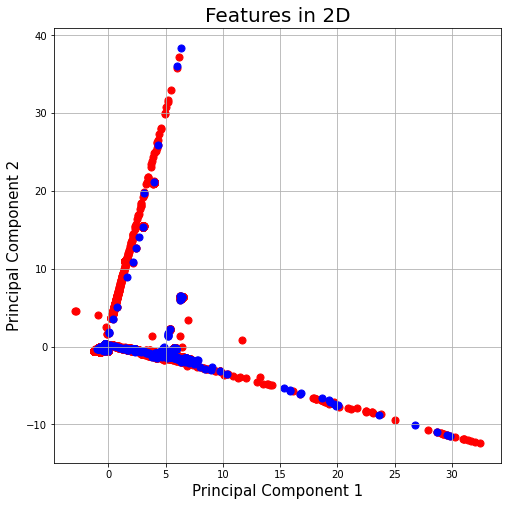

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Features in 2D', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['is_malicious'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'pc1']
               , pca_df.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
    
# ax.legend(targets)
# ax.scatter(pca_df['pc1']
#                , pca_df['pc2']
#                , s = 50)
ax.grid()

In [37]:
smote = SMOTE(random_state=0, sampling_strategy="minority")
X_os, y_os = smote.fit_resample(X, y)
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size = 0.2, random_state=2)

In [33]:
# Decision Tree Classifier

# Create Decision Tree classifer object
clf_os = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_os.fit(X_train_os, y_train_os)

# Predict the response for the test dataset
y_pred_os = clf_os.predict(X_test_os)

# Check Prediction
print(classification_report(y_test_os, y_pred_os))
# print(confusion_matrix(y_test_os, y_pred_os))
print("Accuracy:", accuracy_score(y_test_os, y_pred_os))
print("Label 0:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 0))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 0))
print("Label 1:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 1))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12930
           1       0.99      0.98      0.99     12767

    accuracy                           0.99     25697
   macro avg       0.99      0.99      0.99     25697
weighted avg       0.99      0.99      0.99     25697

Accuracy: 0.9869634587695062
Label 0:
Precision: 0.9838647714175951
Recall: 0.9903325599381284
Label 1:
Precision: 0.9901435104873049
Recall: 0.9835513433069633


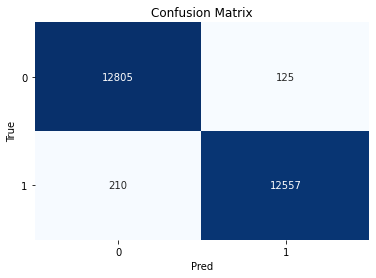

In [34]:
classes = np.unique(y_pred_os)
fig,ax = plt.subplots()
cm = metrics.confusion_matrix(y_test_os,y_pred_os,labels=classes)
sns.heatmap(cm, annot=True,fmt='d',cmap=plt.cm.Blues,cbar=False)
ax.set(xlabel="Pred",ylabel="True",title="Confusion Matrix")
ax.set_yticklabels(labels=classes,rotation=0)
plt.show()

In [35]:
# K Neighbors Classifier

# Create K Neighbors Classifier Object
neigh = KNeighborsClassifier(n_neighbors=3)

# Train K Neighbors Classifier Object
neigh.fit(X_train_os,y_train_os.ravel())

# Predict the response for test dataset
y_pred_os = neigh.predict(X_test_os)

# Check Prediction
print(classification_report(y_test_os, y_pred_os))
# print(confusion_matrix(y_test_os, y_pred_os))
print("Accuracy:", accuracy_score(y_test_os, y_pred_os))
print("Label 0:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 0))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 0))
print("Label 1:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 1))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12930
           1       0.99      0.98      0.99     12767

    accuracy                           0.99     25697
   macro avg       0.99      0.99      0.99     25697
weighted avg       0.99      0.99      0.99     25697

Accuracy: 0.9864964781881154
Label 0:
Precision: 0.9842222735319018
Recall: 0.9890177880897139
Label 1:
Precision: 0.9888224181360201
Recall: 0.9839429779901308


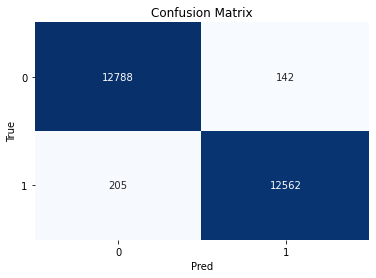

In [36]:
classes = np.unique(y_pred_os)
fig,ax = plt.subplots()
cm = metrics.confusion_matrix(y_test_os,y_pred_os,labels=classes)
sns.heatmap(cm, annot=True,fmt='d',cmap=plt.cm.Blues,cbar=False)
ax.set(xlabel="Pred",ylabel="True",title="Confusion Matrix")
ax.set_yticklabels(labels=classes,rotation=0)
plt.show()

In [37]:
# Logistic Regression

# instantiate model
model = LogisticRegression()

# fit 
model.fit(X_train_os,y_train_os)

# predict
y_pred_os = model.predict(X_test_os)

# Check Prediction
print(classification_report(y_test_os, y_pred_os))
# print(confusion_matrix(y_test_os, y_pred_os))
print("Accuracy:", accuracy_score(y_test_os, y_pred_os))
print("Label 0:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 0))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 0))
print("Label 1:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 1))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 1))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     12930
           1       0.90      0.90      0.90     12767

    accuracy                           0.90     25697
   macro avg       0.90      0.90      0.90     25697
weighted avg       0.90      0.90      0.90     25697

Accuracy: 0.9000272405339145
Label 0:
Precision: 0.9033714864128319
Recall: 0.897293116782676
Label 1:
Precision: 0.8966858565427105
Recall: 0.9027962716378163


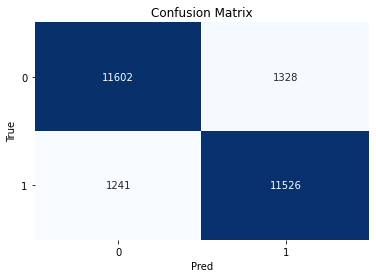

In [38]:
classes = np.unique(y_pred_os)
fig,ax = plt.subplots()
cm = metrics.confusion_matrix(y_test_os,y_pred_os,labels=classes)
sns.heatmap(cm, annot=True,fmt='d',cmap=plt.cm.Blues,cbar=False)
ax.set(xlabel="Pred",ylabel="True",title="Confusion Matrix")
ax.set_yticklabels(labels=classes,rotation=0)
plt.show()

In [38]:
# Random Forest:

# Instantiate Model
random_model = RandomForestClassifier()

# Fit
random_model.fit(X_train_os, y_train_os)

# Predict
y_pred_os = random_model.predict(X_test_os)

# Check Prediction
print(classification_report(y_test_os, y_pred_os))
# print(confusion_matrix(y_test_os, y_pred_os))
print("Accuracy:", accuracy_score(y_test_os, y_pred_os))
print("Label 0:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 0))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 0))
print("Label 1:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 1))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12930
           1       0.99      0.99      0.99     12767

    accuracy                           0.99     25697
   macro avg       0.99      0.99      0.99     25697
weighted avg       0.99      0.99      0.99     25697

Accuracy: 0.9884422306105771
Label 0:
Precision: 0.9897650616422424
Recall: 0.9872389791183295
Label 1:
Precision: 0.987109375
Recall: 0.989660844364377


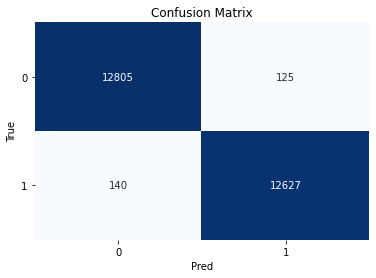

In [40]:
classes = np.unique(y_pred_os)
fig,ax = plt.subplots()
cm = metrics.confusion_matrix(y_test_os,y_pred_os,labels=classes)
sns.heatmap(cm, annot=True,fmt='d',cmap=plt.cm.Blues,cbar=False)
ax.set(xlabel="Pred",ylabel="True",title="Confusion Matrix")
ax.set_yticklabels(labels=classes,rotation=0)
plt.show()

In [41]:
# Gradient Boosting Classifier

# Instantiate Model
gb = GradientBoostingClassifier()

# Fit
gb.fit(X_train_os, y_train_os)

# Predict
y_pred_os = gb.predict(X_test_os)

# Check Prediction
print(classification_report(y_test_os, y_pred_os))
# print(confusion_matrix(y_test_os, y_pred_os))
print("Accuracy:", accuracy_score(y_test_os, y_pred_os))
print("Label 0:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 0))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 0))
print("Label 1:")
print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 1))
print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 1))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     12930
           1       0.93      0.96      0.94     12767

    accuracy                           0.94     25697
   macro avg       0.94      0.94      0.94     25697
weighted avg       0.94      0.94      0.94     25697

Accuracy: 0.9392925244191929
Label 0:
Precision: 0.9542186001917545
Recall: 0.9236658932714618
Label 1:
Precision: 0.9251194901752523
Recall: 0.9551186653089998


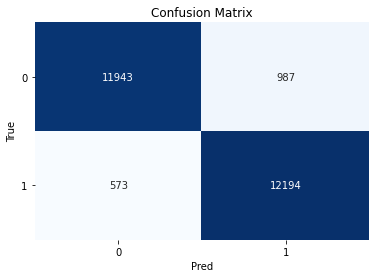

In [42]:
classes = np.unique(y_pred_os)
fig,ax = plt.subplots()
cm = metrics.confusion_matrix(y_test_os,y_pred_os,labels=classes)
sns.heatmap(cm, annot=True,fmt='d',cmap=plt.cm.Blues,cbar=False)
ax.set(xlabel="Pred",ylabel="True",title="Confusion Matrix")
ax.set_yticklabels(labels=classes,rotation=0)
plt.show()

In [43]:
# # sklearn.svm.SVC (Support Vector Classification)

# svc = SVC(gamma="auto")

# svc.fit(X_train_os, y_train_os)

# # Predict
# y_pred_os = svc.predict(X_test_os)

# # Check Prediction
# print(classification_report(y_test_os, y_pred_os))
# # print(confusion_matrix(y_test_os, y_pred_os))
# print("Accuracy:", accuracy_score(y_test_os, y_pred_os))
# print("Label 0:")
# print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 0))
# print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 0))
# print("Label 1:")
# print("Precision:", precision_score(y_test_os, y_pred_os, pos_label = 1))
# print("Recall:", recall_score(y_test_os, y_pred_os, pos_label = 1))

In [44]:
# classes = np.unique(y_pred_os)
# fig,ax = plt.subplots()
# cm = metrics.confusion_matrix(y_test_os,y_pred_os,labels=classes)
# sns.heatmap(cm, annot=True,fmt='d',cmap=plt.cm.Blues,cbar=False)
# ax.set(xlabel="Pred",ylabel="True",title="Confusion Matrix")
# ax.set_yticklabels(labels=classes,rotation=0)
# plt.show()